<a href="https://colab.research.google.com/github/almostoutlier/Projects/blob/main/Datacamp_Introduction_to_Airflow_Certification_Excersises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction to Airflow in Python





1.   Testing a task in Airflow

You've just started looking at using Airflow within your company and would like to try to test run a task within the Airflow platform. You remember that you can use the airflow run command to execute a specific task within a workflow.

An Airflow DAG is set up for you with a dag_id of etl_pipeline. The task_id is download_file and the start_date is 2023-01-08. All other components needed are defined for you.

* airflow tasks test dag task 2023-01-08

* airflow tasks test etl_pipeline task 2023-01-08

* *airflow tasks test etl_pipeline download_file 2023-01-08*

Which command would you enter in the console to run the desired task?

2.  Examining Airflow commands
While researching how to use Airflow, you start to wonder about the airflow command in general. You realize that by simply running airflow you can get further information about various sub-commands that are available.

Which of the following is NOT an Airflow sub-command?
* dags

* *edit_dag*

* tasks

* scheduler

3. Defining a simple DAG

In [ ]:
pip install apache-airflow

In [ ]:
# Import the DAG object
from airflow import DAG

# Define the default_args dictionary
default_args = {
  'owner': 'dsmith',
  'start_date': datetime(2023, 1, 14),
  'retries': 2
}

# Instantiate the DAG object
with DAG('example_etl', default_args=default_args) as etl_dag:
  pass

4. Working with DAGs and the Airflow shell

While working with Airflow, sometimes it can be tricky to remember what DAGs are defined and what they do. You want to gain some further knowledge of the Airflow shell command so you'd like to see what options are available.

Multiple DAGs are already defined for you. How many DAGs are present in the Airflow system from the command-line?

repl:~$ airflow dags list
dag_id       | filepath    | owner   | paused
=============+=============+=========+=======
example_dag  | dag1.py     | airflow | True
update_state | test_dag.py | airflow | True

5. Troubleshooting DAG creation

Now that you've successfully worked with a couple workflows, you notice that sometimes there are issues making a workflow appear within Airflow. You'd like to be able to better troubleshoot the behavior of Airflow when there may be something wrong with the code.

Two DAGs are defined for you and Airflow is setup. Note that any changes you make within the editor are automatically saved.






In [ ]:
from airflow import DAG

default_args = {
  'owner': 'jdoe',
  'email': 'jdoe@datacamp.com'
}
with DAG( 'refresh_data',
          default_args=default_args
        ):
    pass

6. Starting the Airflow webserver

You've successfully created some DAGs within Airflow using the command-line tools, but notice that it can be a bit tricky to handle scheduling / troubleshooting / etc. After reading the documentation further, you realize that you'd like to access the Airflow web interface. For security reasons, you'd like to start the webserver on port 9090.

Which airflow command would you use to start the webserver on port 9090?

Airflow is installed and accessible from the command line. Remember to use the airflow -h command if needed. airflow <subcommand> -h will provide further detail. Note that there may already be a webserver running - you can ignore any error messages you see while searching for the correct command.

* airflow webserver

* airflow start webserver 9090

* airflow webserver -9090

* *airflow webserver -p 9090*

7. Navigating the Airflow UI

To gain some familiarity with the Airflow UI, you decide to explore the various pages. You'd like to know what has happened on your Airflow instance thus far.

Which of the following events have not run on your Airflow instance?

* cli_scheduler

* cli_webserver

* *cli_worker*

8. Examining DAGs with the Airflow UI

You've become familiar with the basics of an Airflow DAG and the basics of interacting with Airflow on the command-line. Your boss would like you to show others on your team how to examine any available DAGs. In this instance, she would like to know which operator is NOT in use with the DAG called update_state, as your team is trying to verify the components used in production workflows.

Remember that the Airflow UI allows various methods to view the state of DAGs. The Tree View lists the tasks and any ordering between them in a tree structure, with the ability to compress / expand the nodes. The Graph View shows any tasks and their dependencies in a graph structure, along with the ability to access further details about task runs. The Code view provides full access to the Python code that makes up the DAG.

Remember to select the operator NOT used in this DAG.


* BashOperator

* PythonOperator

* *JdbcOperator*

* SimpleHttpOperator

# 2. Implementing Airflow DAGs

1. Defining a BashOperator task

The BashOperator allows you to specify any given Shell command or script and add it to an Airflow workflow. This can be a great start to implementing Airflow in your environment.

As such, you've been running some scripts manually to clean data (using a script called cleanup.sh) prior to delivery to your colleagues in the Data Analytics group. As you get more of these tasks assigned, you've realized it's becoming difficult to keep up with running everything manually, much less dealing with errors or retries. You'd like to implement a simple script as an Airflow operator.

The Airflow DAG analytics_dag is already defined for you and has the appropriate configurations in place.

In [ ]:
# Import the BashOperator
from airflow.operators.bash import BashOperator

with DAG(dag_id="test_dag", default_args={"start_date": "2024-01-01"}) as analytics_dag:
  # Define the BashOperator
  cleanup = BashOperator(
      task_id="cleanup_task",
      # Define the bash_command
      bash_command="cleanup.sh",
  )


2. Multiple BashOperators

Airflow DAGs can contain many operators, each performing their defined tasks.

You've successfully implemented one of your scripts as an Airflow task and have decided to continue migrating your individual scripts to a full Airflow DAG. You now want to add more components to the workflow. In addition to the cleanup.sh used in the previous exercise you have two more scripts, consolidate_data.sh and push_data.sh. These further process your data and copy to its final location.

The DAG analytics_dag is defined (meaning you do not need to add the with DAG(...) statement, and your cleanup task is still defined. The BashOperator is already imported.

In [ ]:
# Define a second operator to run the `consolidate_data.sh` script
consolidate = BashOperator(
    task_id='consolidate_task',
    bash_command="consolidate_data.sh"
    )

# Define a final operator to execute the `push_data.sh` script
push_data = BashOperator(
    task_id="pushdata_task",
    bash_command="push_data.sh"
    )


3. Define order of BashOperators

Now that you've learned about the bitshift operators, it's time to modify your workflow to include a pull step and to include the task ordering. You have three currently defined components, cleanup, consolidate, and push_data.

The DAG analytics_dag is available as before and the BashOperator is already imported.

Define a BashOperator called pull_sales with a bash command of wget https://salestracking/latestinfo?json.
Set the pull_sales operator to run before the cleanup task.
Configure consolidate to run next, using the downstream operator.
Set push_data to run last using either bitshift operator.

Define a BashOperator called pull_sales with a bash command of wget https://salestracking/latestinfo?json.

Set the pull_sales operator to run before the cleanup task.

Configure consolidate to run next, using the downstream operator.

Set push_data to run last using either bitshift operator.

In [ ]:
# Define a new pull_sales task
pull_sales = BashOperator(
    task_id='pullsales_task',
    bash_command='wget https://salestracking/latestinfo?json'
)

# Set pull_sales to run prior to cleanup
pull_sales >> cleanup

# Configure consolidate to run after cleanup
consolidate << cleanup

# Set push_data to run last
consolidate >> push_data

4. Determining the order of tasks
While looking through a colleague's workflow definition, you're trying to decipher exactly in which order the defined tasks run. The code in question shows the following:

pull_data << initialize_process

pull_data >> clean >> run_ml_pipeline

generate_reports << run_ml_pipeline

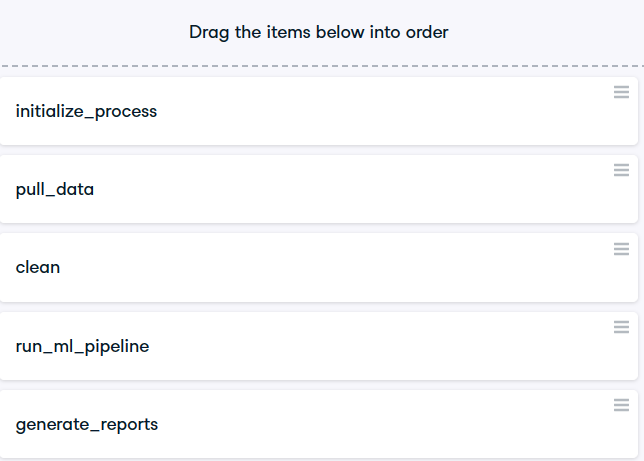

5. Troubleshooting DAG dependencies

You've created a DAG with intended dependencies based on your workflow but for some reason Airflow won't load / execute the DAG. Try using the terminal to:

Run the airflow dags command to see all subcommands available. Look for a subcommand to read errors and run it.
Decipher the error message.
Use cat workspace/dags/codependent.py to view the Python code.
Determine which of the following lines should be removed from the Python code.

repl:~$ cat workspace/dags/codependent.py

from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

default_args = {
  'owner': 'dsmith',
  'start_date': datetime(2023, 2, 12),
  'retries': 1
}

with DAG('codependency', default_args=default_args) as codependency_dag:

  task1 = BashOperator(task_id='first_task',
                     bash_command='echo 1',
                     dag=codependency_dag)

  task2 = BashOperator(task_id='second_task',
                     bash_command='echo 2',
                     dag=codependency_dag)

  task3 = BashOperator(task_id='third_task',
                     bash_command='echo 3',
                     dag=codependency_dag)

task1 must run before task2 which must run beforetask3
  task1 >> task2
  task2 >> task3
  task3 >> task1

* task1 >> task2

* task2 >> task3

* *task3 >> task1*

6. Using the PythonOperator

You've implemented several Airflow tasks using the BashOperator but realize that a couple of specific tasks would be better implemented using Python. You'll implement a task to download and save a file to the system within Airflow.

The requests library is imported for you, and the DAG process_sales_dag is already defined.

Create a new task assigned to the variable pull_file_task, with the id pull_file.

Add the pull_file(URL, savepath) function defined previously to the operator.

Define the arguments needed for the task.

In [ ]:
def pull_file(URL, savepath):
    r = requests.get(URL)
    with open(savepath, 'wb') as f:
        f.write(r.content)
    # Use the print method for logging
    print(f"File pulled from {URL} and saved to {savepath}")

from airflow.operators.python import PythonOperator

# Create the task
pull_file_task = PythonOperator(
    task_id='pull_file',
    # Add the callable
    python_callable=pull_file,
    # Define the arguments
    op_kwargs={'URL':'http://dataserver/sales.json', 'savepath':'latestsales.json'}
)

7. More PythonOperators

To continue implementing your workflow, you need to add another step to parse and save the changes of the downloaded file. The DAG process_sales_dag is defined and has the pull_file task already added. In this case, the Python function is already defined for you, parse_file(inputfile, outputfile).

Note that often when implementing Airflow tasks, you won't necessarily understand the individual steps given to you. As long as you understand how to wrap the steps within Airflow's structure, you'll be able to implement a desired workflow.

Define the Python task to the variable parse_file_task with the id parse_file.

Add the parse_file(inputfile, outputfile) to the Operator.

Define the arguments to pass to the callable.

In [ ]:
# Add another Python task
parse_file_task = PythonOperator(
    task_id='parse_file',
    # Set the function to call
    python_callable=parse_file,
    # Add the arguments
    op_kwargs={'inputfile':'latestsales.json', 'outputfile':'parsedfile.json'},
)

8. EmailOperator and dependencies

Now that you've successfully defined the PythonOperators for your workflow, your manager would like to receive a copy of the parsed JSON file via email when the workflow completes. The previous tasks are still defined and the DAG process_sales_dag is configured. Please note that this task uses the older DAG definition method and is added for you.


Import the class to send emails.

Define the Operator and add the appropriate arguments (to, subject, files).

Set the task order so the tasks run sequentially (Pull the file, parse the file, then email your manager).

In [ ]:
# Import the Operator
from airflow.operators.email import EmailOperator

# Define the task
email_manager_task = EmailOperator(
    task_id='email_manager',
    to='manager@datacamp.com',
    subject='Latest sales JSON',
    html_content='Attached is the latest sales JSON file as requested.',
    files='parsedfile.json',
    dag=process_sales_dag
)

# Set the order of tasks
pull_file_task >> parse_file_task >> email_manager_task

9. Schedule a DAG via Python

You've learned quite a bit about creating DAGs, but now you would like to schedule a specific DAG on a specific day of the week at a certain time. You'd like the code include this information in case a colleague needs to reinstall the DAG to a different server.

The Airflow DAG object and the appropriate datetime methods have been imported for you.

Set the start date of the DAG to November 1, 2023.

Configure the retry_delay to 20 minutes. You will learn more about the timedelta object in Chapter 3. For now, you just need to know it expects an integer value.

Use the cron syntax to configure a schedule of every Wednesday at 12:30pm.

In [ ]:
# Update the scheduling arguments as defined
default_args = {
  'owner': 'Engineering',
  'start_date': datetime(2023, 11, 1),
  'email': ['airflowresults@datacamp.com'],
  'email_on_failure': False,
  'email_on_retry': False,
  'retries': 3,
  'retry_delay': timedelta(minutes=20)
}

dag = DAG('update_dataflows', default_args=default_args, schedule_interval='30 12 * * 3')

10. Deciphering Airflow schedules

Given the various options for Airflow's schedule_interval, you'd like to verify that you understand exactly how intervals relate to each other, whether it's a cron format, timedelta object, or a preset.

Order the schedule intervals from least to greatest amount of time.

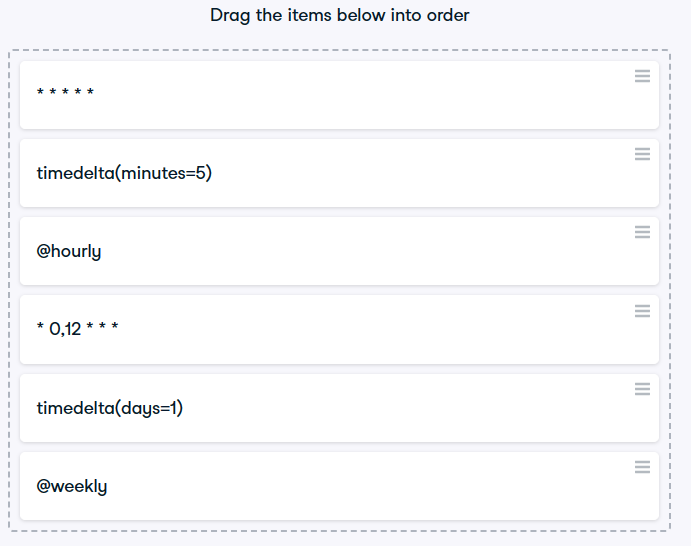

11. Troubleshooting DAG runs

You've scheduled a DAG called process_sales which is set to run on the first day of the month and email your manager a copy of the report generated in the workflow. The start_date for the DAG is set to February 15, 2023. Unfortunately it's now March 2nd and your manager did not receive the report and would like to know what happened.

Use the information you've learned about Airflow scheduling to determine what the issue is.


* *The `schedule_interval` has not yet passed since the `start_date`.*

* The `email_manager_task` is not downstream of the other tasks.

* The DAG run has an error.

* The `op_kwargs` are incorrect for the `EmailOperator`.

# 3. Maintaining and monitoring Airflow workflows



1. Sensors vs operators

As you've just learned about sensors, you want to verify you understand what they have in common with normal operators and where they differ.
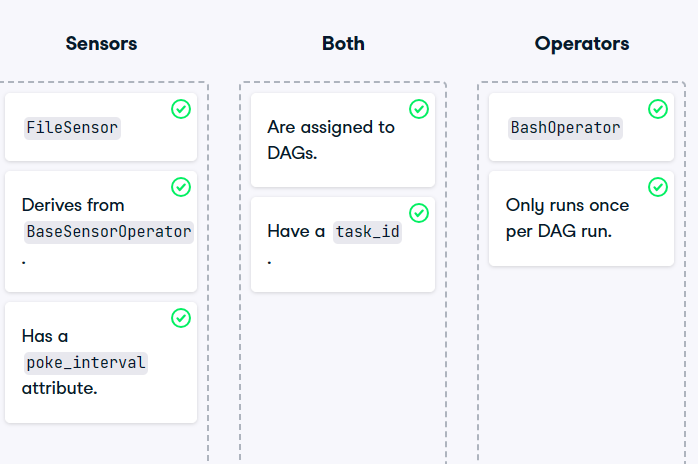

2. Sensory deprivation

You've recently taken over for another Airflow developer and are trying to learn about the various workflows defined within the system. You come across a DAG that you can't seem to make run properly using any of the normal tools. Try exploring the DAG for any information about what it might be looking for before continuing.

* *The DAG is waiting for the file salesdata_ready.csv to be present.*

* The DAG expects a response from the SimpleHttpOperator before starting.

* part1 needs a dependency added.

3. Determining the executor

While developing your DAGs in Airflow, you realize you're not certain the configuration of the system. Using the commands you've learned, determine which of the following statements is true.


* This system can run 12 tasks at the same time.

* *This system can run one task at a time.*

* This system can run as many tasks as needed at a time.

4. DAGs in the bag

You've taken over managing an Airflow cluster that you did not setup and are trying to learn a bit more about the system. Which of the following is true?

Instructions
50XP

* The DAG is scheduled for hourly processing.

* The Airflow user does not have proper permissions.

* *The `dags_folder` is set to `/home/repl/workspace/dags`.*

5. Defining an SLA

You've successfully implemented several Airflow workflows into production, but you don't currently have any method of determining if a workflow takes too long to run. After consulting with your manager and your team, you decide to implement an SLA at the DAG level on a test workflow.

All appropriate Airflow libraries have been imported for you


In [ ]:
# Import the timedelta object
from datetime import timedelta

# Create the dictionary entry
default_args = {
  'start_date': datetime(2024, 1, 20),
  'sla': timedelta(minutes = 30)
}

# Add to the DAG
test_dag = DAG('test_workflow', default_args=default_args , schedule_interval=None)

6. Defining a task SLA

After completing the SLA on the entire workflow, you realize you really only need the SLA timing on a specific task instead of the full workflow.

The appropriate Airflow libraries are imported for you.

In [ ]:
# Import the timedelta object
from datetime import timedelta

test_dag = DAG('test_workflow', start_date=datetime(2024,1,20), schedule_interval=None)

# Create the task with the SLA
task1 = BashOperator(task_id='first_task',
                     sla=timedelta(hours=3),
                     bash_command='initialize_data.sh',
                     dag=test_dag)

7. Generate and email a report

Airflow provides the ability to automate almost any style of workflow. You would like to receive a report from Airflow when tasks complete without requiring constant monitoring of the UI or log files. You decide to use the email functionality within Airflow to provide this message.

All the typical Airflow components have been imported for you, and a DAG is already defined as dag.

In [ ]:
# Define the email task
email_report = EmailOperator(
        task_id='email_report',
        to='airflow@datacamp.com',
        subject='Airflow Monthly Report',
        html_content="""Attached is your monthly workflow report - please refer to it for more detail""",
        files=["monthly_report.pdf"],
        dag=report_dag
)

# Set the email task to run after the report is generated
email_report << generate_report

8. Adding status emails

You've worked through most of the Airflow configuration for setting up your workflows, but you realize you're not getting any notifications when DAG runs complete or fail. You'd like to setup email alerting for the success and failure cases, but you want to send it to two addresses.

Edit the execute_report_dag.py workflow.
Add the emails airflowalerts@datacamp.com and airflowadmin@datacamp.com to the appropriate key in default_args.
Set the failure email option to True.
Configure the success email to send you messages as well.

default_args={

    'email': ['airflowalerts@datacamp.com',
    'airflowadmin@datacamp.com'],
    'email_on_failure': True,
    'email_on_success': True
}



# 4. Building production pipelines in Airflow

1. Creating a templated BashOperator

You've successfully created a BashOperator that cleans a given data file by executing a script called cleandata.sh. This works, but unfortunately requires the script to be run only for the current day. Some of your data sources are occasionally behind by a couple of days and need to be run manually.

You successfully modify the cleandata.sh script to take one argument - the date in YYYYMMDD format. Your testing works at the command-line, but you now need to implement this into your Airflow DAG. For now, use the term {{ ds_nodash }} in your template - you'll see exactly what this is means later on.


Create a templated command to execute the cleandata.sh script with the current execution date given by Airflow. Assign this command to a variable called templated_command.

Modify the BashOperator to use the templated command.


In [ ]:
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

default_args = {
  'start_date': datetime(2023, 4, 15),
}

cleandata_dag = DAG('cleandata',
                    default_args=default_args,
                    schedule_interval='@daily')

# Create a templated command to execute
# 'bash cleandata.sh datestring'
templated_command = """ bash cleandata.sh {{ ds_nodash }} """



# Modify clean_task to use the templated command
clean_task = BashOperator(task_id='cleandata_task',
                          bash_command=templated_command,
                          params={ 'ds_nodash': "datestring"},
                          dag=cleandata_dag)


2. Templates with multiple arguments

You wish to build upon your previous DAG and modify the code to support two arguments - the date in YYYYMMDD format, and a file name passed to the cleandata.sh script.

Ide Exercise Instruction
100XP
Modify the templated command to handle a second argument called filename.
Change the first BashOperator to pass the filename salesdata.txt to the command.
Add a new BashOperator called clean_task2 to use a second filename supportdata.txt.
Set clean_task2 downstream of clean_task.

In [ ]:
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

default_args = {
  'start_date': datetime(2023, 4, 15),
}

cleandata_dag = DAG('cleandata',
                    default_args=default_args,
                    schedule_interval='@daily')

# Modify the templated command to handle a
# second argument called filename.
templated_command = """
  bash cleandata.sh {{ ds_nodash }} {{ params.filename }}
"""

# Modify clean_task to pass the new argument
clean_task = BashOperator(task_id='cleandata_task',
                          bash_command=templated_command,
                          params={'filename': "salesdata.txt"},
                          dag=cleandata_dag)

# Create a new BashOperator clean_task2
clean_task2 = BashOperator(task_id='cleandata_task2',
                           bash_command=templated_command,
                          params={'filename': "supportdata.txt"},
                          dag=cleandata_dag)

# Set the operator dependencies
clean_task2 << clean_task


3. Using lists with templates

Once again, you decide to make some modifications to the design of your cleandata workflow. This time, you realize that you need to run the command cleandata.sh with the date argument and the file argument as before, except now you have a list of 30 files. You do not want to create 30 tasks, so your job is to modify the code to support running the argument for 30 or more files.

The Python list of files is already created for you, simply called filelist.

In [ ]:
from airflow import DAG
from airflow.operators.bash import BashOperator
from datetime import datetime

filelist = [f'file{x}.txt' for x in range(30)]

default_args = {
  'start_date': datetime(2020, 4, 15),
}

cleandata_dag = DAG('cleandata',
                    default_args=default_args,
                    schedule_interval='@daily')

# Modify the template to handle multiple files in a
# single run.
templated_command = """
  <% for filename in params.filenames %>
  bash cleandata.sh {{ ds_nodash }} {{ filename }};
  <% endfor %>
"""

# Modify clean_task to use the templated command
clean_task = BashOperator(task_id='cleandata_task',
                          bash_command=templated_command,
                          params={'filenames': filelist},
                          dag=cleandata_dag)


4. Understanding parameter options

You've used a few different methods to add templates to your workflows. Considering the differences between options, why would you want to create individual tasks (ie, BashOperators) with specific parameters vs a list of files?

For example, why would you choose

t1 = BashOperator(task_id='task1', bash_command=templated_command, params={'filename': 'file1.txt'}, dag=dag)
t2 = BashOperator(task_id='task2', bash_command=templated_command, params={'filename': 'file2.txt'}, dag=dag)
t3 = BashOperator(task_id='task3', bash_command=templated_command, params={'filename': 'file3.txt'}, dag=dag)
over using a loop form such as

t1 = BashOperator(task_id='task1',
                  bash_command=templated_command,
                  params={'filenames': ['file1.txt', 'file2.txt', 'file3.txt']},
                  dag=dag)

Possible Answers
Select one answer

* Using a loop form is slower.

* *Using specific tasks allows better monitoring of task state and possible parallel execution.*

* The params object can only handle lists of a few items.

5. Sending templated emails

While reading through the Airflow documentation, you realize that various operations can use templated fields to provide added flexibility. You come across the docs for the EmailOperator and see that the content can be set to a template. You want to make use of this functionality to provide more detailed information regarding the output of a DAG run.

Ide Exercise Instruction

Create a Python string that represents the email content you wish to send. Use the substitutions for the current date string (with dashes) and a variable called username.

Create the EmailOperator task using the template string for the html_content.

Set the subject field to a macro call using macros.uuid.uuid4(). This simply provides a string of a universally unique identifier as the subject field.

Assign the params dictionary as appropriate with the username of testemailuser.

In [ ]:
from airflow import DAG
from airflow.operators.email import EmailOperator
from datetime import datetime

# Create the string representing the html email content
html_email_str = """
Date: {{ ds }}
Username: {{ params.username }}
"""

email_dag = DAG('template_email_test',
                default_args={'start_date': datetime(2023, 4, 15)},
                schedule_interval='@weekly')

email_task = EmailOperator(task_id='email_task',
                           to='testuser@datacamp.com',
                           subject="{{ macros.uuid.uuid4() }}",
                           html_content=html_email_str,
                           params={'username': 'testemailuser'},
                           dag=email_dag)


6. Define a BranchPythonOperator

After learning about the power of conditional logic within Airflow, you wish to test out the BranchPythonOperator. You'd like to run a different code path if the current execution date represents a new year (ie, 2020 vs 2019).

The DAG is defined for you, along with the tasks in question. Your current task is to implement the BranchPythonOperator.

Instructions

In the function year_check, configure the code to determine if the year of the current execution date is different than the previous execution date (ie, is the year different between the appropriate Airflow template variables.)

Finish the BranchPythonOperator by adding the appropriate arguments.

Set the dependencies on current_year_task and new_year_task.

In [ ]:
# Create a function to determine if years are different
def year_check(**kwargs):
    current_year = int(kwargs['ds_nodash'][0:4])
    previous_year = int(kwargs['prev_ds_nodash'][0:4])
    if current_year == previous_year:
        return 'current_year_task'
    else:
        return 'new_year_task'

# Define the BranchPythonOperator
branch_task = BranchPythonOperator(task_id='branch_task', dag=branch_dag,
                                   python_callable=year_check, provide_context=True)
# Define the dependencies
branch_task >> current_year_task
branch_task >> new_year_task

7. Branch troubleshooting

While working with a workflow defined by a colleague, you notice that a branching operator executes, but there's never any change in the DAG results. You realize that regardless of the state defined by the branching operator, all other tasks complete, even as some should be skipped.

Use what you've learned to determine the most likely reason that the branching operator is ineffective.

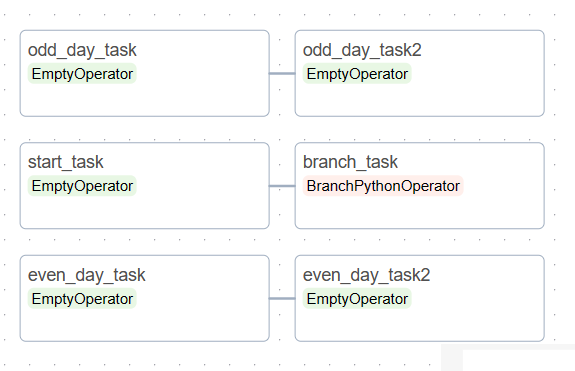

* The `branch_test` method does not return the correct value.

* The DAG does not run often enough for the callable to work properly.

* *The dependency is missing between the `branch_task` and `even_day_task` and `odd_day_task`.*

#1. Creating a production pipeline



You've learned a lot about how Airflow works - now it's time to implement your workflow into a production pipeline consisting of many objects including sensors and operators. Your boss is interested in seeing this workflow become automated and able to provide SLA reporting as it provides some extra leverage for closing a deal the sales staff is working on. The sales prospect has indicated that once they see updates in an automated fashion, they're willing to sign-up for the indicated data service.

From what you've learned about the process, you know that there is sales data that will be uploaded to the system. Once the data is uploaded, a new file should be created to kick off the full processing, but something isn't working correctly.

Refer to the source code of the DAG to determine if anything extra needs to be added.

Update the DAG in pipeline.py to import the needed operators.
Run the sense_file task from the command line and look for any errors. Use the command airflow tasks test and the appropriate arguments to run the command. For the last argument, use a -1 instead of a specific date.
Determine why the sense_file task does not complete and remedy this using the editor. Make sure to scroll through the output in the terminal window.
Re-test the sense_file task and verify the problem is fixed.

In [ ]:
repl:~/workspace/dags$ airflow tasks test etl_update sense_file -1
[2024-04-14T19:05:56.463+0200] {dagbag.py:539} INFO - Filling up the DagBag from /home/repl/workspace/dags
[2024-04-14T19:05:56.640+0200] {taskinstance.py:1157} INFO - Dependencies all met for dep_context=non-requeueable deps ti=<TaskInstance: etl_update.sense_file __airflow_temporary_run_2024-04-14T17:03:05.009412+00:00__ [None]>
[2024-04-14T19:05:56.645+0200] {taskinstance.py:1157} INFO - Dependencies all met for dep_context=requeueable deps ti=<TaskInstance: etl_update.sense_file __airflow_temporary_run_2024-04-14T17:03:05.009412+00:00__ [None]>
[2024-04-14T19:05:56.646+0200] {taskinstance.py:1359} INFO - Starting attempt 1 of 1
[2024-04-14T19:05:56.646+0200] {taskinstance.py:1428} WARNING - cannot record queued_duration for task sense_file because previous state change time has not been saved
[2024-04-14T19:05:56.646+0200] {taskinstance.py:1380} INFO - Executing <Task(FileSensor): sense_file> on 2024-04-01 00:00:00+00:00
[2024-04-14T19:05:56.741+0200] {taskinstance.py:1660} INFO - Exporting env vars: AIRFLOW_CTX_DAG_OWNER='airflow' AIRFLOW_CTX_DAG_ID='etl_update' AIRFLOW_CTX_TASK_ID='sense_file' AIRFLOW_CTX_EXECUTION_DATE='2024-04-01T00:00:00+00:00' AIRFLOW_CTX_TRY_NUMBER='1' AIRFLOW_CTX_DAG_RUN_ID='__airflow_temporary_run_2024-04-14T17:03:05.009412+00:00__'
[2024-04-14T19:05:56.746+0200] {base.py:73} INFO - Using connection ID 'fs_default' for task execution.
[2024-04-14T19:05:56.747+0200] {filesystem.py:64} INFO - Poking for file /home/repl/workspace/startprocess.txt
[2024-04-14T19:06:01.753+0200] {base.py:73} INFO - Using connection ID 'fs_default' for task execution.
[2024-04-14T19:06:01.753+0200] {filesystem.py:64} INFO - Poking for file /home/repl/workspace/startprocess.txt
[2024-04-14T19:06:06.757+0200] {base.py:73} INFO - Using connection ID 'fs_default' for task execution.
[2024-04-14T19:06:06.757+0200] {filesystem.py:64} INFO - Poking for file /home/repl/workspace/startprocess.txt
[2024-04-14T19:06:11.764+0200] {base.py:73} INFO - Using connection ID 'fs_default' for task execution.
[2024-04-14T19:06:11.764+0200] {filesystem.py:64} INFO - Poking for file /home/repl/workspace/startprocess.txt
[2024-04-14T19:06:11.764+0200] {taskinstance.py:1935} ERROR - Task failed with exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/airflow/sensors/base.py", line 274, in execute
    raise AirflowSensorTimeout(message)
airflow.exceptions.AirflowSensorTimeout: Sensor has timed out; run duration of 15.02142000204185 seconds exceeds the specified timeout of 15.0.
[2024-04-14T19:06:11.765+0200] {taskinstance.py:1398} INFO - Immediate failure requested. Marking task as FAILED. dag_id=etl_update, task_id=sense_file, execution_date=20240401T000000, start_date=, end_date=20240414T170611
Traceback (most recent call last):
  File "/usr/local/bin/airflow", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/airflow/__main__.py", line 59, in main
    args.func(args)
  File "/usr/local/lib/python3.9/dist-packages/airflow/cli/cli_config.py", line 49, in command
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/airflow/utils/cli.py", line 113, in wrapper
    return f(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/airflow/cli/commands/task_command.py", line 620, in task_test
    ti.run(ignore_task_deps=True, ignore_ti_state=True, test_mode=True)
  File "/usr/local/lib/python3.9/dist-packages/airflow/utils/session.py", line 77, in wrapper
    return func(*args, session=session, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/airflow/models/taskinstance.py", line 1832, in run
    self._run_raw_task(
  File "/usr/local/lib/python3.9/dist-packages/airflow/utils/session.py", line 74, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/airflow/models/taskinstance.py", line 1516, in _run_raw_task
    self._execute_task_with_callbacks(context, test_mode, session=session)
  File "/usr/local/lib/python3.9/dist-packages/airflow/models/taskinstance.py", line 1679, in _execute_task_with_callbacks
    result = self._execute_task(context, task_orig)
  File "/usr/local/lib/python3.9/dist-packages/airflow/models/taskinstance.py", line 1742, in _execute_task
    result = execute_callable(context=context, **execute_callable_kwargs)
  File "/usr/local/lib/python3.9/dist-packages/airflow/sensors/base.py", line 274, in execute
    raise AirflowSensorTimeout(message)
airflow.exceptions.AirflowSensorTimeout: Sensor has timed out; run duration of 15.02142000204185 seconds exceeds the specified timeout of 15.0.
repl:~/workspace/dags$ touch /home/repl/workspace/startprocess.txt
repl:~/workspace/dags$ airflow tasks test etl_update sense_file -1
[2024-04-14T19:06:45.099+0200] {dagbag.py:539} INFO - Filling up the DagBag from /home/repl/workspace/dags
[2024-04-14T19:06:45.279+0200] {taskinstance.py:1157} INFO - Dependencies all met for dep_context=non-requeueable deps ti=<TaskInstance: etl_update.sense_file __airflow_temporary_run_2024-04-14T17:03:05.009412+00:00__ [None]>
[2024-04-14T19:06:45.284+0200] {taskinstance.py:1157} INFO - Dependencies all met for dep_context=requeueable deps ti=<TaskInstance: etl_update.sense_file __airflow_temporary_run_2024-04-14T17:03:05.009412+00:00__ [None]>
[2024-04-14T19:06:45.284+0200] {taskinstance.py:1359} INFO - Starting attempt 1 of 1
[2024-04-14T19:06:45.284+0200] {taskinstance.py:1428} WARNING - cannot record queued_duration for task sense_file because previous state change time has not been saved
[2024-04-14T19:06:45.285+0200] {taskinstance.py:1380} INFO - Executing <Task(FileSensor): sense_file> on 2024-04-01 00:00:00+00:00
[2024-04-14T19:06:45.374+0200] {taskinstance.py:1660} INFO - Exporting env vars: AIRFLOW_CTX_DAG_OWNER='airflow' AIRFLOW_CTX_DAG_ID='etl_update' AIRFLOW_CTX_TASK_ID='sense_file' AIRFLOW_CTX_EXECUTION_DATE='2024-04-01T00:00:00+00:00' AIRFLOW_CTX_TRY_NUMBER='1' AIRFLOW_CTX_DAG_RUN_ID='__airflow_temporary_run_2024-04-14T17:03:05.009412+00:00__'
[2024-04-14T19:06:45.378+0200] {base.py:73} INFO - Using connection ID 'fs_default' for task execution.
[2024-04-14T19:06:45.379+0200] {filesystem.py:64} INFO - Poking for file /home/repl/workspace/startprocess.txt
[2024-04-14T19:06:45.379+0200] {filesystem.py:69} INFO - Found File /home/repl/workspace/startprocess.txt last modified: 20240414190628
[2024-04-14T19:06:45.379+0200] {base.py:287} INFO - Success criteria met. Exiting.
[2024-04-14T19:06:45.379+0200] {taskinstance.py:1398} INFO - Marking task as SUCCESS. dag_id=etl_update, task_id=sense_file, execution_date=20240401T000000, start_date=, end_date=20240414T170645
repl:~/workspace/dags$

# 2. Creating a production pipeline

Continuing on your last workflow, you'd like to add some additional functionality, specifically adding some SLAs to the code and modifying the sensor components.

Refer to the source code of the DAG to determine if anything extra needs to be added. The default_args dictionary has been defined for you, though it may require further modification.


Add an SLA of 90 minutes to the DAG.

Update the FileSensor object to check for files every 45 seconds.

Modify the python_task to send Airflow variables to the callable. Note that the callable is configured to accept the variables using the provide_context argument.

In [ ]:
from airflow import DAG
from airflow.sensors.filesystem import FileSensor
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator
from dags.process import process_data
from datetime import timedelta, datetime

# Update the default arguments and apply them to the DAG
default_args = {
  'start_date': datetime(2023,1,1),
  'sla': timedelta(minutes= 90)
}

dag = DAG(dag_id='etl_update', default_args=default_args)

sensor = FileSensor(task_id='sense_file',
                    filepath='/home/repl/workspace/startprocess.txt',
                    poke_interval= 45,
                    dag=dag)

bash_task = BashOperator(task_id='cleanup_tempfiles',
                         bash_command='rm -f /home/repl/*.tmp',
                         dag=dag)

python_task = PythonOperator(task_id='run_processing',
                             python_callable=process_data,
                             provide_context= True,
                             dag=dag)

sensor >> bash_task >> python_task


## Adding the final changes to your pipeline

To finish up your workflow, your manager asks that you add a conditional logic check to send a sales report via email, only if the day is a weekday. Otherwise, no email should be sent. In addition, the email task should be templated to include the date and a project name in the content.

The branch callable is already defined for you.


Import the necessary operators.
Configure the EmailOperator to provide the specific data to the callable.
Complete the branch callable as necessary to point to the email_report_task or no_email_task.
Configure the branch operator to properly check for the condition.

In [ ]:
from airflow import DAG
from airflow.sensors.filesystem import FileSensor
from airflow.operators.bash import BashOperator
from airflow.operators.python import PythonOperator
from airflow.operators.python import BranchPythonOperator
from airflow.operators.empty import EmptyOperator
from airflow.operators.email import EmailOperator
from dags.process import process_data
from datetime import datetime, timedelta

# Update the default arguments and apply them to the DAG.

default_args = {
  'start_date': datetime(2023,1,1),
  'sla': timedelta(minutes=90)
}

dag = DAG(dag_id='etl_update', default_args=default_args)

sensor = FileSensor(task_id='sense_file',
                    filepath='/home/repl/workspace/startprocess.txt',
                    poke_interval=45,
                    dag=dag)

bash_task = BashOperator(task_id='cleanup_tempfiles',
                         bash_command='rm -f /home/repl/*.tmp',
                         dag=dag)

python_task = PythonOperator(task_id='run_processing',
                             python_callable=process_data,
                             provide_context=True,
                             dag=dag)


email_subject="""
  Email report for {{ params.department }} on {{ ds_nodash }}
"""


email_report_task = EmailOperator(task_id='email_report_task',
                                  to='sales@mycompany.com',
                                  subject=email_subject,
                                  html_content='',
                                  params={'department': 'Data subscription services'},
                                  dag=dag)


no_email_task = EmptyOperator(task_id='no_email_task', dag=dag)


def check_weekend(**kwargs):
    dt = datetime.strptime(kwargs['execution_date'],"%Y-%m-%d")
    # If dt.weekday() is 0-4, it's Monday - Friday. If 5 or 6, it's Sat / Sun.
    if (dt.weekday() < 5):
        return 'email_report_task'
    else:
        return 'no_email_task'


branch_task = BranchPythonOperator(task_id='check_if_weekend',
                                   provide_context=True,
                                   python_callable=check_weekend,
                                   dag=dag)


sensor >> bash_task >> python_task

python_task >> branch_task >> [email_report_task, no_email_task]
